In [1]:
import numpy as np

In [20]:
training=np.array([[2, 60], [4, 70], [6, 80], [8, 90], [1, 50], [9, 95]])
label=np.array([0,0,1,1,0,1])
 
#distance
def eudist(a,b):
    a= np.sqrt(((a[0]-b[0])**2)+(a[1]-b[1])**2)
    return a
#print(eudist([0,0],[1,1]))
#knn algo
def knn_predict(test,k,training,label):
    dist=[]
    for i in range(len(training)):
        dist.append([eudist(test,training[i]),label[i]])
    dist.sort(key=lambda x:x[0])
    nn=dist[:k]

    #voting
    votes=[label for _,label in nn]
    predict=max(set(votes),key=votes.count)
    return predict

result=knn_predict([5,75],3,training,label)
print("prediction","pass" if result==0 else "fail")

prediction pass


In [ ]:
###knn program 


# KNN Classifier and Accuracy Calculation

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# dataset
data = pd.read_csv(r"C:\Users\LOQ\OneDrive\Desktop\learning python\comapny.csv")

X = data.iloc[:, :-1]   # all columns except last(features)
y = data.iloc[:, -1]    # last column as label(output)

 #trainig data and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#KNN model
k = 5   # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#  Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of KNN Classifier:", accuracy)


Accuracy of KNN Classifier: 1.0


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Load dataset
data = pd.read_csv(r"C:\Users\LOQ\OneDrive\Desktop\learning python\naives.csv")


X = data.iloc[:, :-1]#feature
y = data.iloc[:, -1].map({"No":0,"Yes":1})#target

# Encode categorical features
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Categorical Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
#cross validation 
scores = cross_val_score(
    model, X_encoded, y, cv=5, scoring="accuracy"
)

print("Cross-validation accuracy:", scores.mean())

print("Accuracy using CategoricalNB:", accuracy)



Cross-validation accuracy: 0.5666666666666667
Accuracy using CategoricalNB: 0.3333333333333333


Accuracy of LDA: 1.0


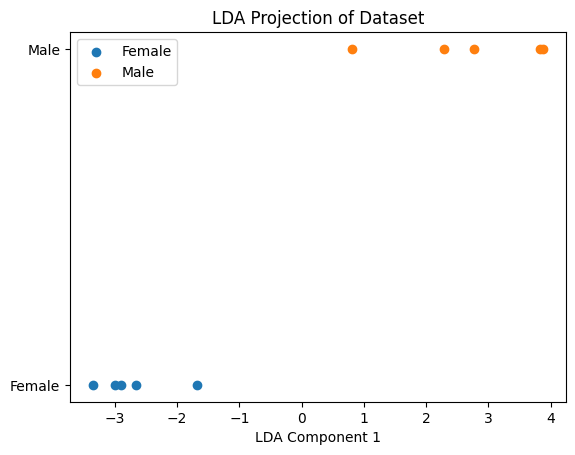

In [ ]:
###lda

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

#dataset
data = pd.read_csv(r"C:\Users\LOQ\OneDrive\Desktop\learning python\ldadata.csv")


X = data.iloc[:, :-1]#f
y = data.iloc[:, -1]#trgt

# Encode class labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#  Apply LDA to dim reduction
lda = LinearDiscriminantAnalysis(n_components=1)#Reduce data to 1 dimension
X_lda = lda.fit_transform(X, y_encoded)


X_train, X_test, y_train, y_test = train_test_split(
    X_lda, y_encoded, test_size=0.2, random_state=42
)

# LDA classifier
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

#  Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of LDA:", accuracy)


#plotting map

plt.figure()
plt.scatter(
    X_lda[y_encoded == 0],
    [0] * sum(y_encoded == 0),
    label="Female"
)

plt.scatter(
    X_lda[y_encoded == 1],
    [1] * sum(y_encoded == 1),
    label="Male"
)

plt.xlabel("LDA Component 1")
plt.yticks([0, 1], ["Female", "Male"])
plt.title("LDA Projection of Dataset")
plt.legend()
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

data = pd.read_csv(r"C:\Users\LOQ\OneDrive\Desktop\learning python\lr.csv")

x=data.iloc[:,:-1]
y=data.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

#performace matrix
r2= r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score (Regression Accuracy):", r2)
print("Mean Squared Error:", mse)



R² Score (Regression Accuracy): 0.9999510461541352
Mean Squared Error: 0.012532184541371054


In [34]:
import numpy as np

x=np.array([1,2,4,6,8,9])
y=np.array([4,8,17,24,31,36])

intercept,slope=0,0
alpha=0.01
itr=1000
m=len(x)
#decent gradient 
for i in range(itr):
    y_i=slope*x+intercept

    d_intercept=(1/m)*np.sum(y_i-y)
    d_slope=(1/m)*np.sum((y_i-y)*x)

    intercept-=alpha*d_intercept
    slope-=alpha*d_slope   

print("bias,weigth",intercept,slope) 

#prediction

pred=slope*3+intercept
print("predicted",pred)

#mse
mse=np.mean((pred-12)**2)
print("mse",mse)


bias,weigth 0.4005212198090476 3.9206968673174627
predicted 12.162611821761434
mse 0.026442604576572402


In [36]:
#logistic regression
import numpy as np

a = np.array([1, 2, 3, 4, 5])
y = np.array([0, 0, 0, 1, 1])

intercept,slope=0.0,0.0
alpha=0.1
itr=1000
m=len(a)

def sigmoid(z):
    return 1/(1+np.exp(-z))
    

for i in range(itr):
    z=slope*a+intercept
    y_i=sigmoid(z)
     
    e=y_i-y
    d_intercept=(1/m)*np.sum(e)
    d_slope=(1/m)*np.sum(e*a)

    intercept-=alpha*d_intercept
    slope-=alpha*d_slope
 
print("bias,weigth",intercept,slope)

a_n=3.5
pred=sigmoid(slope*a_n+intercept)
print("Probability:", pred)
print("Class:", 1 if pred >= 0.5 else 0)

bias,weigth -5.956350539118638 1.769045864973106
Probability: 0.5585575479511986
Class: 1
